# Tejas Nisar
## Task : Prediction using supervised ML
## statment: Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


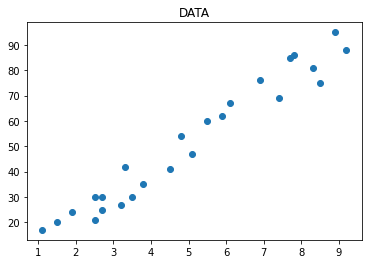

In [4]:
plt.title("DATA")
plt.scatter(x = data["Hours"], y = data["Scores"])
plt.show()

## The above graph shows a linear relationship between "Hours" and "Scores"

In [5]:
TRAIN_SIZE = 0.7
VALIDATION_SIZE = 0.15
TEST_SIZE = 0.15
X = data[["Hours"]].values
y =  data[["Scores"]].values

In [6]:
train_start = 0
train_end = int(TRAIN_SIZE*25) #no. of rows 25
val_start = train_end
val_end = int((TRAIN_SIZE+VALIDATION_SIZE)*25)
test_start = val_end

In [7]:
#Splitint in train test data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (17, 1), y_train: (17, 1)
X_val: (4, 1), y_test: (4, 1)
X_test: (4, 1), y_test: (4, 1)


In [8]:
#standersising data 
def standardize_data(data, mean, std):
    return (data - mean)/std

In [9]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [10]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

### linear regression is a model which learns on the basis of linearirty 
### basicaly y = (weights)X + (intercept) :weights = w; intercept = b

In [11]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

## Traning ~

In [12]:
itterations = 100
RATE =1e-1

In [13]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))
N = len(y_train)

# Training loop
for itteration in range(itterations):
    
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if itteration%10 == 0:
        print (f"Itteration: {itteration}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -RATE * dW
    b += -RATE * db

Itteration: 0, loss: 0.993
Itteration: 10, loss: 0.055
Itteration: 20, loss: 0.044
Itteration: 30, loss: 0.044
Itteration: 40, loss: 0.044
Itteration: 50, loss: 0.044
Itteration: 60, loss: 0.044
Itteration: 70, loss: 0.044
Itteration: 80, loss: 0.044
Itteration: 90, loss: 0.044


## Here we can se that the loss is reducing after every loop, this help in determining appropriate weight and bias

In [14]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [15]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.04, test_MSE: 0.06


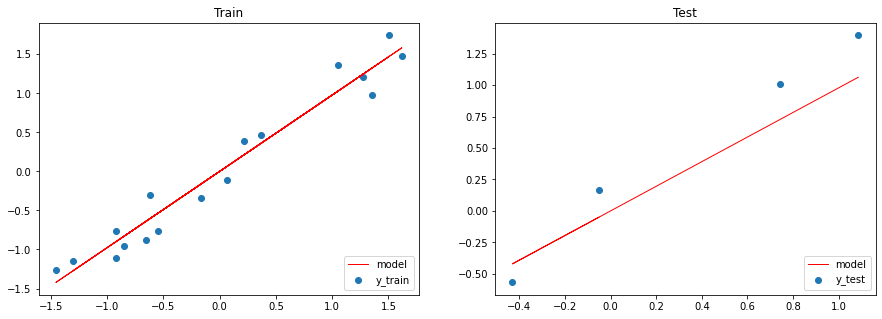

In [16]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

In [17]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print("y=W*x + b")
print (f"[model] y = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

y=W*x + b
[model] y = 9.6X + 2.2


## we have been asked What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
ans = W_unscaled * 9.25 + b_unscaled
print(f'if a student studies for 9.25 hrs/ day he might score {ans}')

if a student studies for 9.25 hrs/ day he might score [[91.31429033]]
